Toimme pandan, numpyn sekä .csv -tiedoston projektimme:

In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Muuttujaan "spotify" määritetään koko datatiedosto (.csv):
spotify = pd.read_csv('spotify_songs.csv')

Poistimme seuraavat sarakkeet, jotka eivät olleet tarpeellisia tässä analyysissä:

In [63]:
# .drop() -komento poistaa taulukosta halutut sarakkeet:
spotify = spotify.drop(['track_id',
                        'track_album_id',
                        'playlist_name',
                        'playlist_id',
                        'duration_ms',
                        'loudness',
                        'mode',
                        'energy',
                        'danceability',
                        'key',
                        'speechiness',
                        'acousticness',
                        'instrumentalness',
                        'liveness',
                        'valence','playlist_subgenre'],
                        # Axis -parametri:
                        axis = 1)

                        # "axis" parametrillä eritellään vaaka- & pystyrivit toisistaan:
                        #   - axis = 0 valitsee vaakarivin (yksittäinen rivi)
                        #   - axis = 1 valitsee pystyrivin (kokonainen sarake)

Muutimme kolumnien nimiä:

In [64]:
# .rename() -komento valitsee kolumneista halutut nimet, jotka voi vaihtaa:
spotify = spotify.rename(columns = {'track_name' : 'Track Name',
                                    'track_artist' : 'Artist',
                                    'track_popularity' : 'Popularity',
                                    'track_album_name' : 'Album Name',
                                    'track_album_release_date' : 'Release Date',
                                    'playlist_genre' : 'Genre',
                                    'tempo' : 'Tempo (BPM)'
                                    })

Muutimme Tempo -murtoluvun kokonaisluvuksi:

In [65]:
spotify['Tempo (BPM)'] = spotify['Tempo (BPM)'].astype(int)

Lopuksi tulostimme DataFrame taulukon:

In [66]:
# .head() -komento tulostaa oletuksena taulukon ensimmäiset 5 riviä | lisäämällä parametrit, tulostimme halutun rivimäärän (tässä tapauksessa ensimmäiset 2000 riviä):
spotify.head(2000)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
1995,Bachelorette,Ashe,42,Bachelorette,2019-04-03,pop,87
1996,Playground,More Giraffes,46,Playground,2019-06-12,pop,80
1997,Flares,The Script,59,No Sound Without Silence,2014-09-12,pop,164
1998,Hungover You,Hazey Eyes,45,Hungover You,2019-01-30,pop,111


In [67]:
spotify.sort_values("Popularity", ascending=False)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,latin,98
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,pop,98
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,edm,116
23104,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,116
21468,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,116
...,...,...,...,...,...,...,...
15604,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,0,Hot Rocks 1964-1971,1971-12-20,rock,135
4977,Stone,JOY.,0,Stone,2014-10-28,pop,124
4975,Walk Away,LANY,0,Hot Lights,2014-04-22,pop,85
11326,The Back Seat Of My Car,Paul McCartney,0,Wingspan (UK Version),2001-05-07,rock,163


In [68]:
def categorize_popularity(Popularity):
    if Popularity >= 0 and Popularity < 25:
        return 'low'
    elif Popularity >=25 and Popularity<50:
        return 'medium'
    elif Popularity >=50 and Popularity<75:
        return 'high'
    elif Popularity >= 75:
        return 'extremely-high'
    
spotify['Popularity'] = spotify['Popularity'].apply(categorize_popularity)
    

In [187]:
spotify.head(1000)

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
995,Dancing By Yourself,Junior Sanchez,medium,Dancing By Yourself,2019-06-14,pop,123
996,Hurt U,EAUXMAR,medium,Hurt U,2019-01-18,pop,114
997,It Ain't Over,Funk Machine,medium,It Ain't Over,2019-06-07,pop,80
998,Shadows (feat. Veronica),Adam K,medium,Shadows (feat. Veronica),2019-05-10,pop,117


In [70]:
spotify.dropna(subset=['Track Name', 'Artist','Album Name'], inplace=True)
missing_count = spotify.isnull().sum()
print(missing_count)


Track Name      0
Artist          0
Popularity      0
Album Name      0
Release Date    0
Genre           0
Tempo (BPM)     0
dtype: int64


In [76]:
spotify.drop_duplicates(subset=['Track Name'])

,Track Name,Artist,Popularity,Album Name,Release Date,Genre,Tempo (BPM)
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,high,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,122
1,Memories - Dillon Francis Remix,Maroon 5,high,Memories (Dillon Francis Remix),2019-12-13,pop,99
2,All the Time - Don Diablo Remix,Zara Larsson,high,All the Time (Don Diablo Remix),2019-07-05,pop,124
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,high,Call You Mine - The Remixes,2019-07-19,pop,121
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,high,Someone You Loved (Future Humans Remix),2019-03-05,pop,123
...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,Lush & Simon,medium,City Of Lights (Vocal Mix),2014-04-28,edm,128
32829,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,low,Closer Remixed,2013-03-08,edm,128
32830,Sweet Surrender - Radio Edit,Starkillers,low,Sweet Surrender (Radio Edit),2014-04-21,edm,127
32831,Only For You - Maor Levi Remix,Mat Zo,low,Only For You (Remixes),2014-01-01,edm,128


In [186]:
for column in spotify.columns:
    unique_values = spotify[column].unique()
    num_unique = len(unique_values)
    data_type = spotify[column].dtype

    print(f"Sarake: {column}")
    print(f"Uniikit arvot: {unique_values}")
    print(f"Uniikkien arvojen määrä: {num_unique}")
    print(f"Sarakkeen tyyppi: {data_type}")
    

    # Tunnista attribuuttitiedot
    
    if num_unique == 2:
        print(f"{column} on binaarinen attribuutti")
        print()
    elif num_unique > 2 and data_type == 'object':
        print(f"{column} on nimellinen attribuutti")
        print()
    elif num_unique > 2 and (data_type == 'int64' or data_type == 'float64'):
        print(f"{column} on järjestyslukuinen attribuutti")
        print()


Sarake: Track Name
Uniikit arvot: ["I Don't Care (with Justin Bieber) - Loud Luxury Remix"
 'Memories - Dillon Francis Remix' 'All the Time - Don Diablo Remix' ...
 'Sweet Surrender - Radio Edit' 'Only For You - Maor Levi Remix'
 'Typhoon - Original Mix']
Uniikkien arvojen määrä: 23449
Sarakkeen tyyppi: object
Track Name on nimellinen attribuutti

Sarake: Artist
Uniikit arvot: ['Ed Sheeran' 'Maroon 5' 'Zara Larsson' ...
 'Ferry Corsten feat. Jenny Wahlstrom' 'Tegan and Sara' 'Mat Zo']
Uniikkien arvojen määrä: 10692
Sarakkeen tyyppi: object
Artist on nimellinen attribuutti

Sarake: Popularity
Uniikit arvot: ['high' 'medium' 'low' 'extremely-high']
Uniikkien arvojen määrä: 4
Sarakkeen tyyppi: object
Popularity on nimellinen attribuutti

Sarake: Album Name
Uniikit arvot: ["I Don't Care (with Justin Bieber) [Loud Luxury Remix]"
 'Memories (Dillon Francis Remix)' 'All the Time (Don Diablo Remix)' ...
 'Sweet Surrender (Radio Edit)' 'Only For You (Remixes)' 'Typhoon/Storm']
Uniikkien arvojen

In [174]:
tempo_min = np.min(spotify['Tempo (BPM)'])
tempo_max = np.max(spotify['Tempo (BPM)'])

print(f"Minimi tempo: {tempo_min}")
print(f"Maksimi tempo: {tempo_max}")

Minimi tempo: 0
Maksimi tempo: 239


In [175]:
tempo_mean = np.mean(spotify['Tempo (BPM)'])
tempo_median = np.median(spotify['Tempo (BPM)'])

print(f"Keskiarvo (Mean) Tempo (BPM): {tempo_mean}")
print(f"Mediaani (Median) Tempo (BPM): {tempo_median}")

# Keskihajonta ja varianssi
tempo_std = np.std(spotify['Tempo (BPM)'])
tempo_var = np.var(spotify['Tempo (BPM)'])

print(f"Keskihajonta (Standard Deviation) Tempo (BPM): {tempo_std}")
print(f"Varianssi (Variance) Tempo (BPM): {tempo_var}")

# Summa ja tulo
tempo_sum = np.sum(spotify['Tempo (BPM)'])
tempo_product = np.prod(spotify['Tempo (BPM)'])

print(f"Summa (Sum) Tempo (BPM): {tempo_sum}")
print(f"Tulo (Product) Tempo (BPM): {tempo_product}")

Keskiarvo (Mean) Tempo (BPM): 120.4069696600463
Mediaani (Median) Tempo (BPM): 121.0
Keskihajonta (Standard Deviation) Tempo (BPM): 26.905683982226
Varianssi (Variance) Tempo (BPM): 723.9158305514129
Summa (Sum) Tempo (BPM): 3952720
Tulo (Product) Tempo (BPM): 0


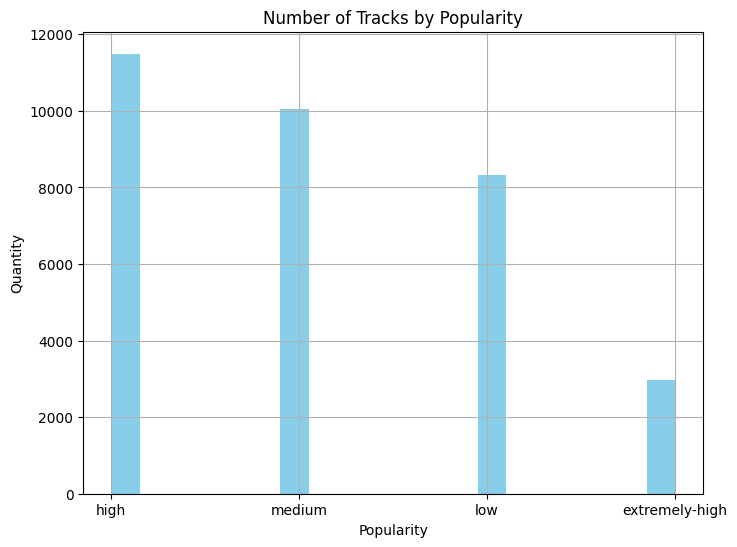

In [134]:
plt.figure(figsize=(8, 6))
plt.hist(spotify['Popularity'], bins=20, color='skyblue')
plt.title('Number of Tracks by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

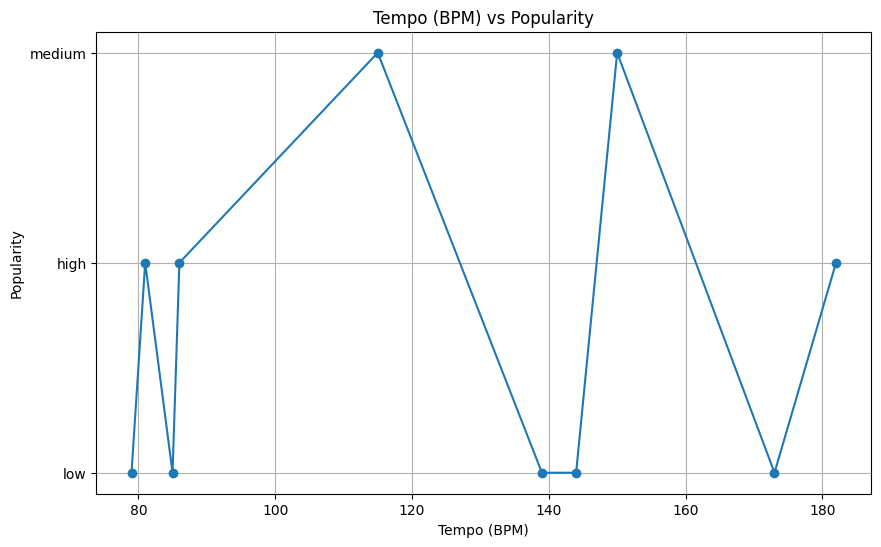

In [173]:
spotify_subset = spotify.sample(10)  # Valitaan 20 eri kappaletta kaavioon
spotify_subset = spotify_subset.sort_values(by='Tempo (BPM)', ascending=True)

plt.figure(figsize=(10, 6))
plt.plot(spotify_subset['Tempo (BPM)'], spotify_subset['Popularity'], marker='o')
plt.title('Tempo (BPM) vs Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

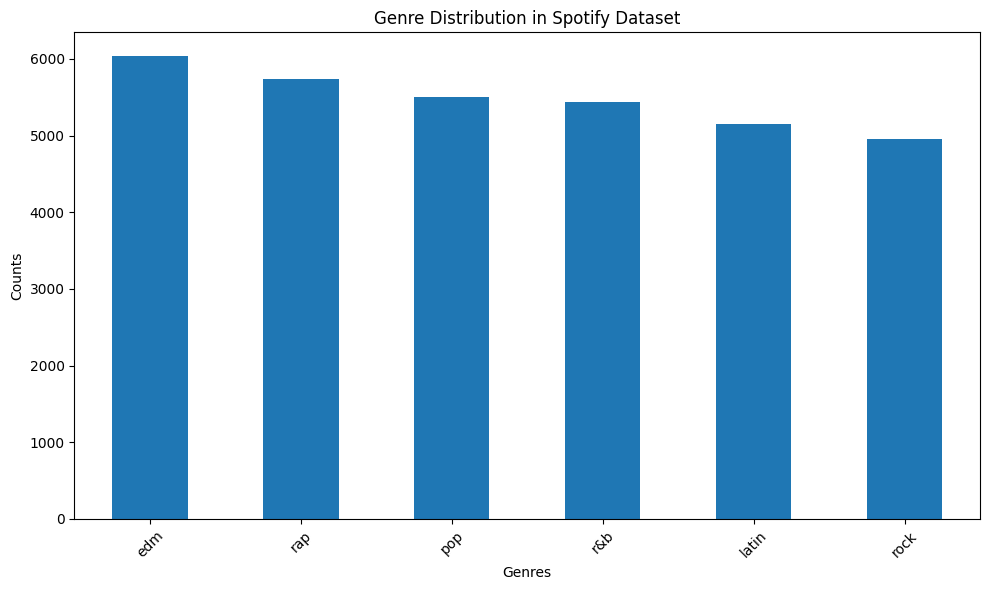

In [78]:
# Oletetaan vaikka sarakkeen 'Genre' datan pohjalta
genre_counts = spotify['Genre'].value_counts()

# Luodaan pylväskaavio
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution in Spotify Dataset')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

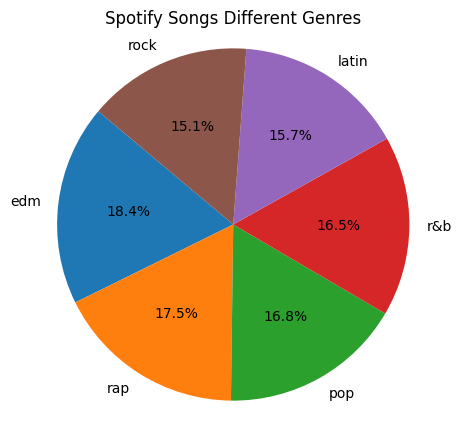

In [73]:
categories = spotify['Genre']

category_counts = categories.value_counts()

plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Spotify Songs Different Genres')

plt.show()

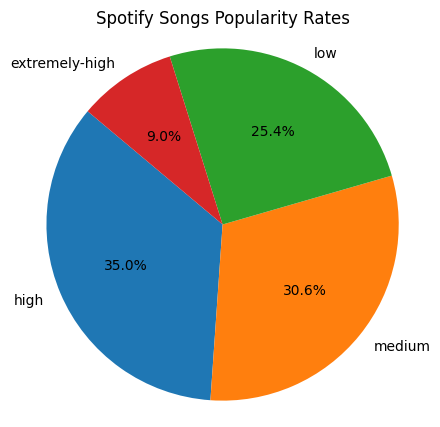

In [72]:
categories = spotify['Popularity']

category_counts = categories.value_counts()

plt.figure(figsize=(5, 5))  # Set the size of the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Spotify Songs Popularity Rates')

plt.show()